
📌 Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       135
           1       0.93      0.87      0.90        15

    accuracy                           0.98       150
   macro avg       0.96      0.93      0.94       150
weighted avg       0.98      0.98      0.98       150

ROC-AUC Score: 0.9296296296296297


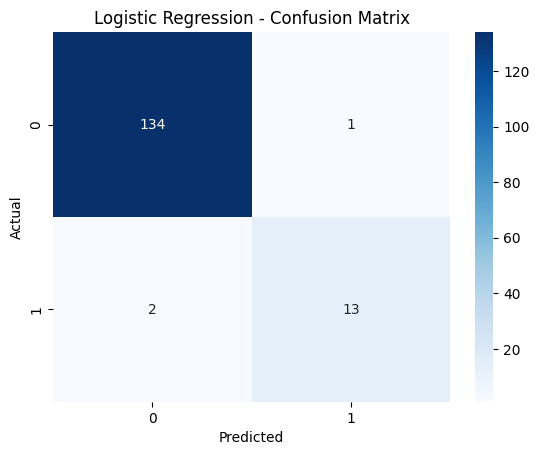


📌 Decision Tree Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00        15

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

ROC-AUC Score: 1.0


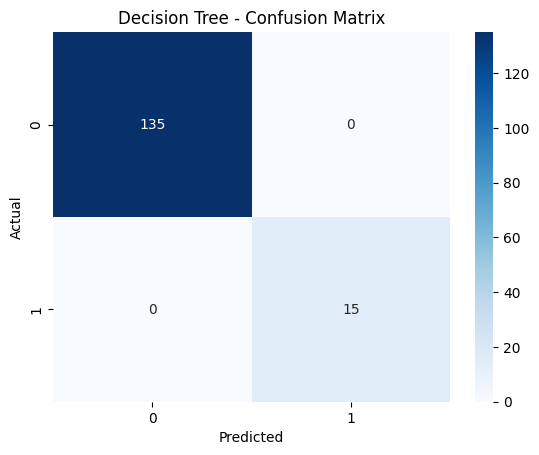


📌 Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00        15

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

ROC-AUC Score: 1.0


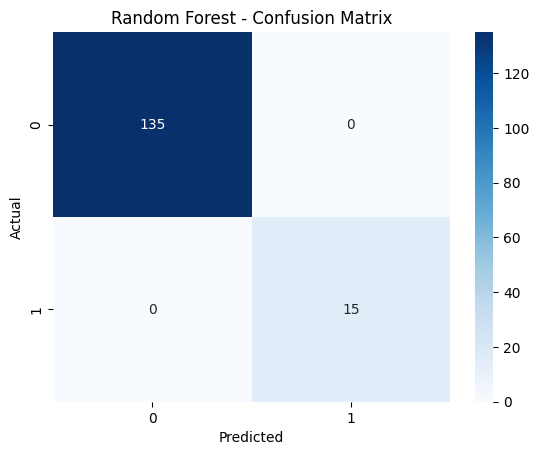

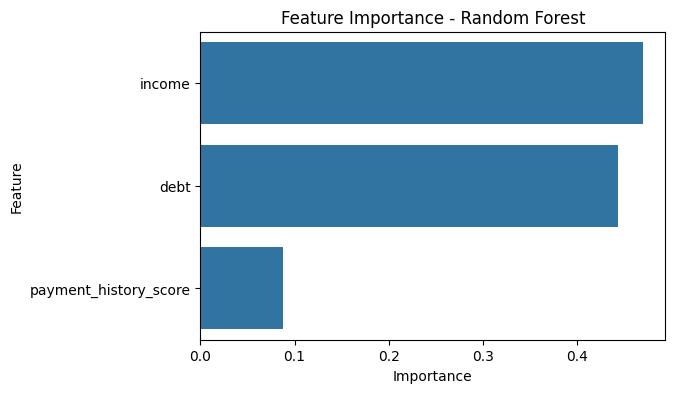

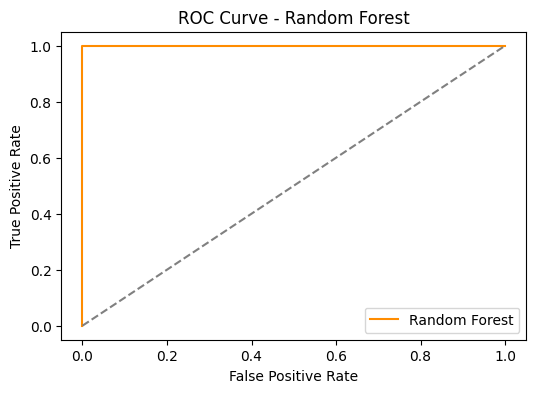

In [1]:
#  Credit Scoring Model


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt


np.random.seed(0)
data = pd.DataFrame({
    'income': np.random.randint(20000, 100000, 500),
    'debt': np.random.randint(1000, 30000, 500),
    'payment_history_score': np.random.randint(300, 850, 500)
})

# 🧠 Generate target column based on logic: high debt + low income = default
data['default'] = ((data['income'] < 50000) & (data['debt'] > 20000)).astype(int)


X = data[['income', 'debt', 'payment_history_score']]
y = data['default']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


def evaluate_model(name, y_true, y_pred):
    print(f"\n📌 {name} Performance:")
    print(classification_report(y_true, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_true, y_pred))
    
    
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)


importances = rf.feature_importances_
features = ['income', 'debt', 'payment_history_score']

plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='Random Forest', color='darkorange')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
